# DSE 207R FINAL PROJECT
## Fall 2023
### Due Date:  December 12th, 2023

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries.

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting. Make sure to follow Slack for any updates on the final project.

# <b>Deliverables</b>:
The final project has 2 submissions - a report(this notebook) and an presentation video(self recorded). You will be evaluated on both the components.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset(on github) such that it can be used as a url directly. Don't forget to add your name on top as the author of the notebook.



There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.

Below are some resources but you are not limited to them -

UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php <br>
Kaggle: https://www.kaggle.com/datasets <br>
KDnuggets Dataset: http://www.kdnuggets.com/datasets/index.html <br>
government data (http://www.kdnuggets.com/datasets/government-local-public.html) <br>
Data APIs (http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html <br>
Data Mining Competitions (http://www.kdnuggets.com/competitions/index.html <br>
US Government Data: https://www.data.gov/ <br>
UK Government Data: https://data.gov.uk/ <br>
Canada's Open Data Exchange: https://codx.ca/ <br>
World Health Organization: http://www.who.int/gho/en <br>
World Bank: http://data.worldbank.org/ <br>

Remember! Finding a dataset of interest and exploring it is most of your job for your final project. So expect this to take some time - and that's both perfectly normal and completely okay. Get started early and make sure to check if the dataset you find satisfies the project requirements.
<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

# Cardiovascular Diseases (CVDs) 
### Cardiovascular Diseases are a group of disorders that include diseased vessels, structural problems, blood clots, etc. According to the World Health Organization (WHO), CVDs account for the leading cause of death globally. Approximately 17.9 million people die globally from CVDs each year and according to the CDC approximately 877,500 Americans annually comprise this number. This data exploration is very personal to me, as my father passed away when I was 26, in 2019 from a CVD. 
### Some CVD Leading Risk Factors are: 
* High Blood Pressure (130/80 mm Hg or higher)
* High LDL Cholesterol levels (which can double a person's risk of heart disease)
* Smoking and secondhand smoke exposure 
* Obesity and Physical Inactivity

### The purpose of this project, is to analyze different features and their contribution to CVDs. 

### This data comprises 1024 cases and types of input feature categories: 


### We will create another column, BMI in this dataset to look at obesity in terms of weight and height.
* According to the National Institute of Health (NIH) higher BMI leads to a higher risk of heart disease. 
* A BMI greater than 25 is considered overweight and greater than 30 is considered obese. 

In [3]:
# Import Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from ast import literal_eval
from itertools import chain
from sklearn.metrics import precision_recall_fscore_support
from tqdm.notebook import tqdm, trange
from sklearn.model_selection import StratifiedKFold
import torch
from transformers import AutoModel, AutoTokenizer
from sklearn.cluster import KMeans
from sklearn import metrics

### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your dataset?

In [5]:
# Ingest dataset
# Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data
cvd_df = pd.read_csv("heart.csv", delimiter=',')
cvd_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## About the Data
* From the imported dataset, we see that there are 1024 observations and 13 features of interest (not including the target). 

Features: 
| Feature name | Description | Datatype |
| --- | --- | --- |
| age | Age of case | int - years|
| sex | Gender | categorical code int 1: women, 0: men|
|cp|Chest Pain |categorical code int 0-3 increasing with pain|
|trestbps |resting blood pressure|int - mmHg|
|chol|serum cholestoral|int - mg/dl|
|fbs|fasting blood sugar |int - 1 = true; 0 = false|
|restecg|resting electrocardiographic results|int - 0,1,2|
|thalach|maximum heart rate achieved|int|
|exang|exercise induced angina|int - 1 = yes; 0 = no|
|oldpeak|ST depression induced by exercise relative to rest|float |
|slope|the slope of the peak exercise ST segment|int|
|ca|number of major vessels (0-3) colored by flourosopy|int - 0-3 |
|thal|Thalassemia (blood disorder which causes cardiac iron accumulation)|int - 1 = normal; 2 = fixed defect; 3= reversable defect|
|target|Presence or absence of cardiovascular disease|int binary - 0: no, 1: yes |


In [7]:
cvd_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# # Checking for null data
cvd_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Are there any duplicate?
cvd_df[cvd_df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
cvd_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
# Ensuring that certain columns () do not contain zero, as that would not make sense. 

nonzero_df = cvd_df[[ 'age', 'trestbps', 'chol', 'thalach', 'thal']]
nonzero_df
for column in nonzero_df: 
    if (nonzero_df[column] == 0).all():
        print('all')

In [12]:
# Getting rid of outliers from age, resting blood pressure, cholesterol level, maximum heart rate achieved,   
cvd_df.drop(cvd_df[(cvd_df['age'] > cvd_df['age'].quantile(0.975)) | (cvd_df['age'] < cvd_df['age'].quantile(0.025))].index,inplace=True)
cvd_df.drop(cvd_df[(cvd_df['trestbps'] > cvd_df['trestbps'].quantile(0.975)) | (cvd_df['trestbps'] < cvd_df['trestbps'].quantile(0.025))].index,inplace=True)
cvd_df.drop(cvd_df[(cvd_df['chol'] > cvd_df['chol'].quantile(0.975)) | (cvd_df['chol'] < cvd_df['chol'].quantile(0.025))].index,inplace=True)
cvd_df.drop(cvd_df[(cvd_df['thalach'] > cvd_df['thalach'].quantile(0.975)) | (cvd_df['thalach'] < cvd_df['thalach'].quantile(0.025))].index,inplace=True)


In [13]:
cvd_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,54.477488,0.723934,0.953791,131.526066,245.501185,0.142180,0.524882,149.008294,0.331754,1.073460,1.386256,0.768957,2.325829,0.491706
std,8.208188,0.447315,1.038521,14.967915,42.296768,0.349442,0.518321,20.609081,0.471122,1.141052,0.604531,1.042369,0.636379,0.500228
min,37.000000,0.000000,0.000000,102.000000,166.000000,0.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,135.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,70.000000,1.000000,3.000000,174.000000,353.000000,1.000000,2.000000,184.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


We can see the the min, max outliers from age (min - 29, max - 77), resting blood pressure (94, 200), cholesterol level (126 ,564), and maximum heart rate achieved were removed (71 , 202). 

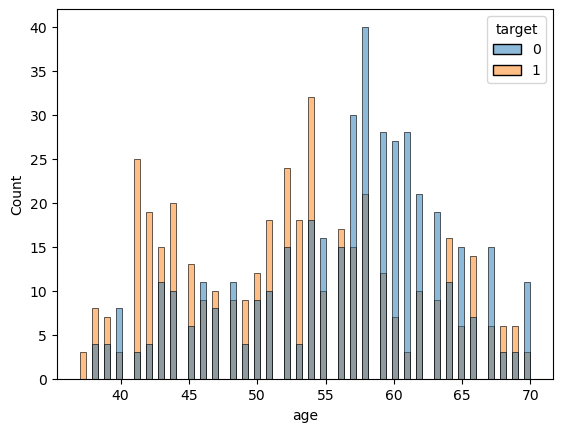

In [16]:
# Creating a stacked barplot
sns.histplot(data=cvd_df, x="age", hue="target",bins=75)
plt.show()

In [ ]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



In [ ]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


In [ ]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

# 2. Video

Make a video where you go over each part of the report speaking about the steps you undertook and explaining your work, reasonings, insights and highlighting the important points of the project. You do not need to explain the lines of code (unless you feel it is required).

1. The video should be more than 5 minutes and strictly less than 10 minutes.
2. Both audio and video is required.
3. You can use the zoom to record the video. Start a meeting, start video, start recording and share screen.
4. Make sure your audio is clear before uploading the video to the gradescope.
